In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# change directory to the fake_news_model.py folder
os.chdir('/content/drive/MyDrive/my-flask-app')

Importing all the required libraries for preprocessing

In [3]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset")

Skipping, found downloaded files in "./fake-and-real-news-dataset" (use force=True to force download)


In [7]:
#Importing the Dataset
real_news = pd.read_csv('/content/drive/MyDrive/my-flask-app/fake-and-real-news-dataset/True.csv')
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
#Importing the Dataset
fake_news = pd.read_csv('/content/drive/MyDrive/my-flask-app/fake-and-real-news-dataset/Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
#Assigning classes to the dataset
real_news['class'] = 1
fake_news['class'] = 0

In [10]:
# Dataset shape
real_news.shape, fake_news.shape

((21417, 5), (23481, 5))

In [11]:
# Merging both the Datasets
New_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
New_Dataset.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
# Check for null values in Dataset
New_Dataset.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
# Reshuffling the Dataset
New_Dataset = New_Dataset.sample(frac = 1)
New_Dataset.head()

,title,text,subject,date,class
22291,Eric Trump Gives DUMBEST Defense For His Brot...,The White House is getting really nervous toda...,News,"July 11, 2017",0
1131,Two Republican senators seek to add flexibilit...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"October 19, 2017",1
38758,BUSTED: The Oh So Objective ABC News Chief Anc...,Just like Hillary Stephanopoulos claims it was...,Government News,"May 14, 2015",0
12155,Pence trip to Middle East overshadowed by Trum...,WASHINGTON (Reuters) - U.S. Vice President Mik...,worldnews,"December 15, 2017",1
21594,"If You’re Looking For Ways To Irritate Trump,...",It s been a well-known fact for quite some tim...,News,"October 28, 2017",0


In [14]:
# Indexing dataset
New_Dataset.reset_index(inplace = True)
New_Dataset.head()

,index,title,text,subject,date,class
0,22291,Eric Trump Gives DUMBEST Defense For His Brot...,The White House is getting really nervous toda...,News,"July 11, 2017",0
1,1131,Two Republican senators seek to add flexibilit...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"October 19, 2017",1
2,38758,BUSTED: The Oh So Objective ABC News Chief Anc...,Just like Hillary Stephanopoulos claims it was...,Government News,"May 14, 2015",0
3,12155,Pence trip to Middle East overshadowed by Trum...,WASHINGTON (Reuters) - U.S. Vice President Mik...,worldnews,"December 15, 2017",1
4,21594,"If You’re Looking For Ways To Irritate Trump,...",It s been a well-known fact for quite some tim...,News,"October 28, 2017",0


In [15]:
# Removing unwanted columns
New_Dataset = New_Dataset.drop(['index', 'title','subject','date'], axis = 1)
New_Dataset.head()

,text,class
0,The White House is getting really nervous toda...,0
1,WASHINGTON (Reuters) - Republican U.S. Senator...,1
2,Just like Hillary Stephanopoulos claims it was...,0
3,WASHINGTON (Reuters) - U.S. Vice President Mik...,1
4,It s been a well-known fact for quite some tim...,0


In [16]:
# Converting the text feature from a float object to a string object
# New_Dataset['text'] = str(New_Dataset['text'])
print(isinstance(New_Dataset['text'],(str,)))
print(New_Dataset['text'])

False
0        The White House is getting really nervous toda...
1        WASHINGTON (Reuters) - Republican U.S. Senator...
2        Just like Hillary Stephanopoulos claims it was...
3        WASHINGTON (Reuters) - U.S. Vice President Mik...
4        It s been a well-known fact for quite some tim...
                               ...                        
44893    BANGKOK (Reuters) - The ashes and bones of Tha...
44894    Trump has just made his campaign CEO, Steve Ba...
44895    WASHINGTON (Reuters) - President Donald Trump ...
44896    After Donald Trump gave out Lindsey Graham s c...
44897    WASHINGTON (Reuters) - The head of the U.S. Ho...
Name: text, Length: 44898, dtype: object


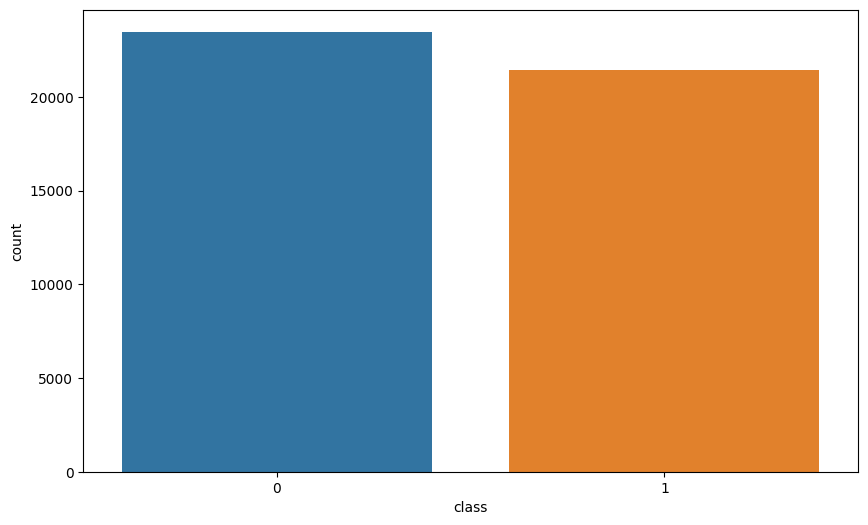

In [17]:
# Plotting Dataset
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = New_Dataset, x='class')
plt.show()

In [18]:
# Preprocessing dataset
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0,len(New_Dataset)):
  review = re.sub('[^a-zA-Z]', ' ', New_Dataset['text'][i])
  review = review.lower()
  review = review.split()

  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(corpus)
print(tfidf.idf_)

[ 8.21566324  9.22726415 11.01902362 ... 10.32587644 11.01902362
 11.01902362]


In [21]:
print(tfidf.vocabulary_)

{'white': 102488, 'house': 41158, 'getting': 34954, 'really': 76431, 'nervous': 63416, 'today': 94102, 'donald': 24849, 'trump': 95525, 'jr': 47417, 'tweeted': 96262, 'damning': 20818, 'copy': 18779, 'email': 27442, 'chain': 14809, 'discussion': 23902, 'setting': 83875, 'meeting': 58124, 'kremlin': 50726, 'connected': 18216, 'russian': 80775, 'lawyer': 52160, 'order': 67166, 'obtain': 65944, 'dirt': 23720, 'hillary': 40063, 'clinton': 16650, 'also': 2845, 'son': 87168, 'law': 52109, 'jared': 45919, 'kushner': 51111, 'alleged': 2613, 'president': 72874, 'former': 32608, 'campaign': 13228, 'manager': 55990, 'paul': 69274, 'manafort': 55984, 'held': 39395, 'tower': 94613, 'amateur': 3047, 'claim': 16342, 'know': 50205, 'nothing': 64985, 'even': 29140, 'though': 93273, 'tout': 94598, 'micromanager': 59020, 'junior': 47684, 'brother': 11813, 'eric': 28481, 'stepped': 88832, 'defend': 21892, 'twitter': 96328, 'tuesday': 95955, 'way': 101653, 'father': 30551, 'strangely': 89287, 'quiet': 7509

In [22]:
example = corpus[10]
example

'republican state senator utah belief porn threat public health proposing legislation make state take aversion skin flick official whatever happened limited government sen todd weiler introduced legislation friday asking state recognize porn creating public health hazard called reform take pornography epidemic harming citizen utah nation politician told daily news porn addictive powerful drug public needed start seeing adult film national epidemic read book expert tell pornography difficult overcome cocaine said weiler compare public attitude adult film early th century feeling cigarette doctor openly smoked airplane smoking section belief legislation help shift public opinion state senator made another strange comparison interview newspaper despite republican conservative denying existence climate change weiler said denying negative health effect adult film like denying climate science scientific fact like global warming legislator cited experience divorce lawyer providing expert insi

In [23]:
example = tfidf.transform([example])
print(example.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [24]:
#Preparing train and test sets
x = corpus
y = New_Dataset['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

In [25]:
# Convert raw data into matrix using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [26]:
print(xv_train)

  (0, 73932)	0.030850825267963428
  (0, 72331)	0.03321144507639758
  (0, 32298)	0.019026152193561522
  (0, 1135)	0.0415504394354508
  (0, 87811)	0.01742427309389162
  (0, 11470)	0.018661490051810645
  (0, 38761)	0.024743624444115243
  (0, 8028)	0.08079429177150892
  (0, 74071)	0.048028007454028854
  (0, 81067)	0.08079429177150892
  (0, 74269)	0.040896445498346916
  (0, 85461)	0.08079429177150892
  (0, 58027)	0.023992320969746465
  (0, 67211)	0.034236484832834334
  (0, 12208)	0.041788951057469936
  (0, 27453)	0.06414473660436784
  (0, 45304)	0.02653858732415332
  (0, 27520)	0.03359750604778537
  (0, 39370)	0.028748005581548282
  (0, 841)	0.03472336020246597
  (0, 87161)	0.030798995113021192
  (0, 72987)	0.03017936770492412
  (0, 60414)	0.023553009146438843
  (0, 78229)	0.019716430747154744
  (0, 66316)	0.029016726579800818
  :	:
  (31427, 65159)	0.10278536210662102
  (31427, 44955)	0.03017533639122961
  (31427, 35138)	0.07539376634224962
  (31427, 40875)	0.2200004509717617
  (31427, 546

In [27]:
print(y_train)

33958    1
19813    0
25814    0
18689    1
44673    1
        ..
30403    1
21243    1
42613    0
43567    1
2732     0
Name: class, Length: 31428, dtype: int64


In [28]:
print(xv_test)

  (0, 91172)	0.06461524272901634
  (0, 90926)	0.03354434114729393
  (0, 90815)	0.019112222285370437
  (0, 90028)	0.0536549750438882
  (0, 89860)	0.05554950577472373
  (0, 89691)	0.03492106721823942
  (0, 89656)	0.04963401916071558
  (0, 89263)	0.050491926555538386
  (0, 88080)	0.04049090015829826
  (0, 87954)	0.025667629466556197
  (0, 87811)	0.023999332582550797
  (0, 87576)	0.11050680571105101
  (0, 86580)	0.09459785775114155
  (0, 86498)	0.024532754260294658
  (0, 85547)	0.03656105119083441
  (0, 84073)	0.13109433691126252
  (0, 83228)	0.04098741378078671
  (0, 82090)	0.0517000434978677
  (0, 81559)	0.04369550918424569
  (0, 81105)	0.04146098012128951
  (0, 80788)	0.03780049392917626
  (0, 80252)	0.040784748619569766
  (0, 80070)	0.07595942729097654
  (0, 79788)	0.06231880491017462
  (0, 79706)	0.056328742764199864
  :	:
  (13469, 18565)	0.03134396201792768
  (13469, 18486)	0.05571342060605943
  (13469, 16652)	0.05813201803769579
  (13469, 16393)	0.0703412041701676
  (13469, 15922)	

In [29]:
# Naive Bayes
# fit the training dataset on the NB classifier
from sklearn.naive_bayes import MultinomialNB
import pickle
Naive = MultinomialNB()
Naive.fit(xv_train, y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(xv_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test))
print(classification_report(y_test, predictions_NB))

Naive Bayes Accuracy Score ->  0.9391982182628063
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7117
           1       0.94      0.93      0.94      6353

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



Confusion matrix, without normalization


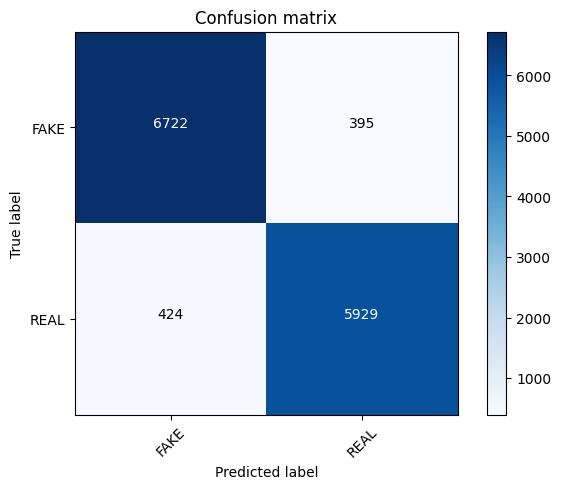

In [30]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_NB)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(xv_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xv_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test))
print(classification_report(y_test, predictions_SVM))


SVM Accuracy Score ->  0.9936896807720861
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7117
           1       0.99      1.00      0.99      6353

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix, without normalization


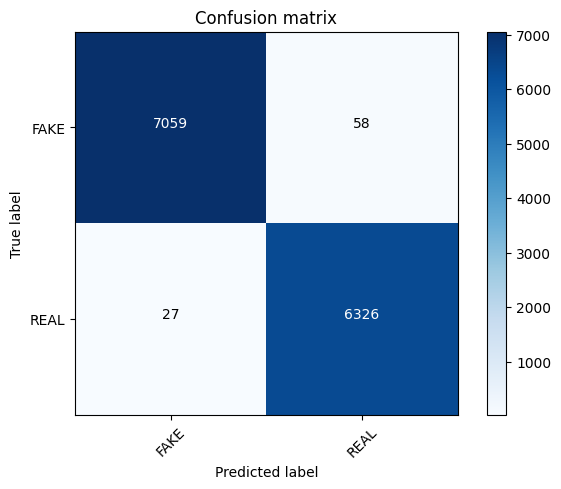

In [32]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_SVM)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
#def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
 #   model = LogisticRegression(C=_C).fit(X_tr, y_tr)
  #  score = model.score(X_test, y_test)
   # print('Test Score with', description, 'features', score)
    #return model

log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=log_reg.fit(xv_train, y_train)
predictions_Logreg = log_reg.predict(xv_test)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_Logreg, y_test))
print(classification_report(y_test, predictions_Logreg))

[LibLinear]Logistic Regression Accuracy Score ->  0.9919821826280624
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7117
           1       0.99      0.99      0.99      6353

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix, without normalization


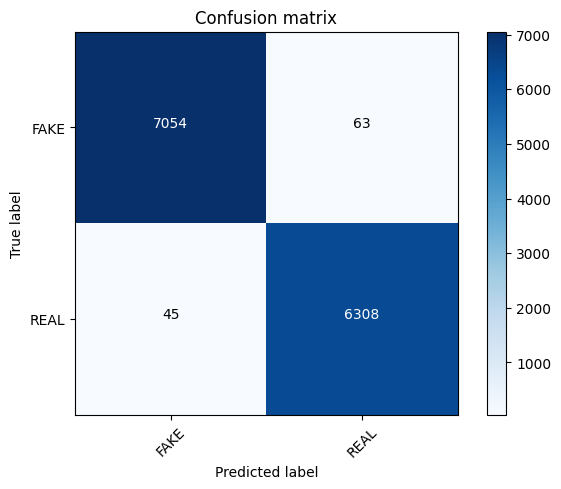

In [34]:
# Plotting the confusion matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text (j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, predictions_Logreg)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Testing the model using NB classifier

In [35]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [36]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"

In [37]:
def manual_testing(news, vectorization, Naive):
    vectorization = TfidfVectorizer()
    xv_train = vectorization.fit_transform(x_train)
    Naive = MultinomialNB()
    Naive.fit(xv_train, y_train)
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(preprocess_text)
    new_x_test = new_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predictions_NB = Naive.predict(new_xv_test)
    pred_prob = Naive.predict_proba(new_xv_test)[0]
    print("Prediction: {} (Probabilities: {})".format(output_label(pred_prob), pred_prob))
    print(new_x_test)
news = str(input())
manual_testing(news, vectorization, Naive)

 South Korea's jobless rate in May falls to record low
Prediction: real news (Probabilities: [0.34460445 0.65539555])
0    south korea jobless rate may fall record low
Name: text, dtype: object


Testing the model using SVM classifier

In [38]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [39]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"


In [41]:
from scipy.special import expit

def manual_testing(news, vectorization, SVM, new_xv_test):
    decision_scores = SVM.decision_function(new_xv_test)
    probabilities = expit(decision_scores)

    if probabilities > 0.5:
        print("Prediction: real news (Probability: {:.2f})".format(probabilities[0]))
    else:
        print("Prediction: fake news (Probability: {:.2f})".format(1 - probabilities[0]))

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(xv_train, y_train)

testing_news = {"text": [news]}
new_test = pd.DataFrame(testing_news)
new_test["text"] = new_test["text"].apply(preprocess_text)
new_x_test = new_test["text"]
new_xv_test = vectorization.transform(new_x_test)
news = str(input())
manual_testing(news, vectorization, SVM, new_xv_test)
print(new_x_test)

South Korea's jobless rate in May falls to record low
Prediction: fake news (Probability: 0.74)
0    outh korea jobless rate may fall record low
Name: text, dtype: object


Testing the model using LR classifier

In [42]:
def preprocess_text(news):
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [43]:
def output_label(pred_prob):
    max_prob = max(pred_prob)
    if max_prob > 0.5:
        return "real news" if pred_prob[1] > pred_prob[0] else "fake news"
    else:
        return "fake news"

In [44]:
def manual_testing(news, vectorization, LR):
    vectorization = TfidfVectorizer()
    xv_train = vectorization.fit_transform(x_train)
    LR = LogisticRegression()
    LR.fit(xv_train, y_train)
    testing_news = {"text":[news]}
    new_test = pd.DataFrame(testing_news)
    new_test["text"] = new_test["text"].apply(preprocess_text)
    new_x_test = new_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predictions_LR = LR.predict(new_xv_test)
    pred_prob = LR.predict_proba(new_xv_test)[0]
    print("Prediction: {} (Probabilities: {})".format(output_label(pred_prob), pred_prob))
    print(new_x_test)

news = str(input())
manual_testing(news, vectorization, LR)

South Korea's jobless rate in May falls to record low
Prediction: fake news (Probabilities: [0.78352537 0.21647463])
0    south korea jobless rate may fall record low
Name: text, dtype: object
